## Water Collection and Usage

Simulation

The simulation models water collection and usage on a daily basis.

It accomdates the following inputs and parameters:

rain faill by day
alternate / make-up water intake
collection area
reservoir capacity
flow rate (total) . . . by subsection is possible
usage rate

can simulate weather patterns or use historic data

historic data :  https://www.ncdc.noaa.gov/cdo-web/datatools

interesting related work : https://www.sciencedirect.com/science/article/pii/S1364815219307133



### Jupyter Lab Setup

I suggest working in a notebook.  There are a few options.  Jupyter, Jupyter Lab, Collab are among them.  

Install:

Customize:



### Data

In [1]:
# conda install -c conda-forge pywr

Weather data is available from many sources.  Here I use the meteostat package to pull data as needed from meteostat (meteostat is a weather data repository that has an API that can be accessed.  The meteostat python package is another tool for accessing the meteostat data.  (Same name, different thing).

Before finding that, I downloaded csv files


Here is a short how-to artilce on the meteostat python package :https://amitprius.medium.com/fetch-weather-and-climate-data-with-meteostat-open-source-python-library-8eef0f258011
here is the documentation:  https://dev.meteostat.net/python/api/daily/#parameters
and the code:  https://amitprius.medium.com/fetch-weather-and-climate-data-with-meteostat-open-source-python-library-8eef0f258011https://github.com/meteostat/meteostat-python

meteostat is the easier and will be used below.  CSV files contain more data types and an example is provided.  Other paths surely exist.

#### Initialize Environment

In [9]:
import pandas as pd

import pywr

# Import Meteostat library and dependencies
from datetime import datetime
import matplotlib.pyplot as plt
from meteostat import Point, Daily

In [2]:
# if we were using a csv file to read data from we can uncomment the following: 
"""
import os
import sys

os.getcwd()
os.chdir('/Users/eric/projects/hydroponics') 

sample_rainfall_data = pd.read_csv("pittsburgh_airport_precipitation.csv",low_memory=False)
sample_rainfall_data.head(5)
"""

'\nimport os\nimport sys\n\nos.getcwd()\nos.chdir(\'/Users/eric/projects/hydroponics\') \n\nsample_rainfall_data = pd.read_csv("pittsburgh_airport_precipitation.csv",low_memory=False)\nsample_rainfall_data.head(5)\n'

In [3]:
# import meteostat

### meteostat package examples

meteostats is used by identifying the nearest weather station to the location one is interested in.  Data is available at hourly, daily and monthly intervals.  The daily data includes the following 10 fields:

Column	Description	Type

station	The Meteostat ID of the weather station (only if query refers to multiple stations)	String

time	The date	Datetime64 <br>
tavg	The average air temperature in °C	Float64 <br>
tmin	The minimum air temperature in °C	Float64 <br>
tmax	The maximum air temperature in °C	Float64 <br>
prcp	The daily precipitation total in mm	Float64 <br>
snow	The snow depth in mm	Float64 <br>
wdir	The average wind direction in degrees (°)	Float64 <br>
wspd	The average wind speed in km/h	Float64 <br>
wpgt	The peak wind gust in km/h	Float64 <br>
pres	The average sea-level air pressure in hPa	Float64 <br>
tsun	The daily sunshine total in minutes (m) <br>



In [10]:
# Import Meteostat library
from meteostat import Stations

# Get nearby weather stations
stations = Stations()
stations = stations.nearby(40.44241651051319, -79.94687475176225)  # Hamerschlag Hall
pittsburgh = Point(40.44241651051319, -79.94687475176225, 382)
station = stations.fetch(1)

# Print DataFrame
print(station)


                           name country region   wmo  icao  latitude  \
id                                                                     
F2UX6  Allegheny County Airport      US     PA  <NA>  KAGC   40.3552   

       longitude  elevation          timezone hourly_start hourly_end  \
id                                                                      
F2UX6   -79.9214      382.0  America/New_York   2022-04-23 2023-12-24   

      daily_start  daily_end monthly_start monthly_end     distance  
id                                                                   
F2UX6  2022-04-24 2022-04-26           NaT         NaT  9935.061522  


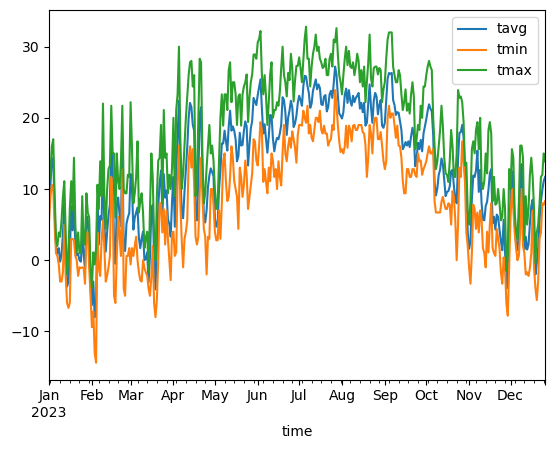

In [19]:
# Set time period
start = datetime(2023, 1, 1)
end = datetime(2023, 12, 26)

# Get daily data for 2018
# data = Daily(pittsburgh, start, end)

data = Daily(pittsburgh, start, end)

data = data.fetch()

# Plot line chart including average, minimum and maximum temperature
data.plot(y=['tavg', 'tmin', 'tmax'])
plt.show()

In [20]:
data

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
time,,,,,,,,,,
2023-01-01,8.6,5.6,11.1,0.0,0.0,235.0,11.8,NaN,1016.0,NaN
2023-01-02,10.7,9.0,12.2,2.9,0.0,117.0,4.4,NaN,1018.3,NaN
2023-01-03,14.3,10.6,16.0,23.4,0.0,189.0,14.4,NaN,1010.5,NaN
2023-01-04,14.3,10.0,17.0,3.9,0.0,196.0,12.4,NaN,1008.3,NaN
2023-01-05,7.0,5.0,9.4,0.2,0.0,247.0,11.7,NaN,1014.3,NaN
...,...,...,...,...,...,...,...,...,...,...
2023-12-22,5.6,3.0,8.0,0.0,NaN,154.0,6.9,NaN,1027.0,NaN
2023-12-23,8.3,3.9,11.7,3.1,NaN,172.0,10.4,NaN,1024.9,NaN
2023-12-24,9.9,8.0,12.0,1.6,NaN,149.0,6.2,NaN,1026.2,NaN


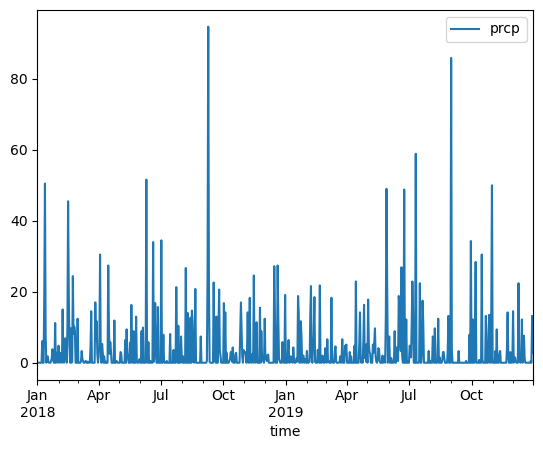

In [15]:

# Get daily data for 2018
data = Daily(pittsburgh, start, end)
data = data.fetch()

# Plot line chart including average, minimum and maximum temperature
data.plot(y=['prcp'])
plt.show()

In [16]:
from meteostat import Stations

stations = Stations()
stations = stations.nearby(49.2497, -123.1193)
station = stations.fetch(1)

print(station)

                       name country region    wmo  icao  latitude  longitude  \
id                                                                             
71201  Vancouver Harbour CS      CA     BC  71201  CWHC      49.3    -123.12   

       elevation           timezone hourly_start hourly_end daily_start  \
id                                                                        
71201        2.0  America/Vancouver   1980-03-01 2023-11-05  1925-11-01   

       daily_end monthly_start monthly_end     distance  
id                                                       
71201 2023-12-20    1925-01-01  2022-01-01  5593.335349  


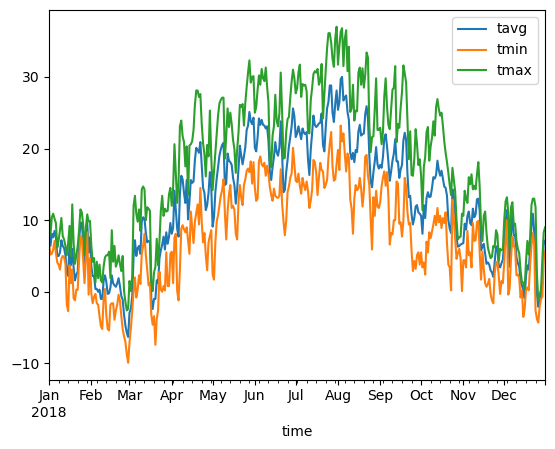

In [17]:
# Import Meteostat library and dependencies
from datetime import datetime
import matplotlib.pyplot as plt
from meteostat import Stations, Daily

# Set time period
start = datetime(2018, 1, 1)
end = datetime(2018, 12, 31)

# Get daily data
data = Daily('10637', start, end)
data = data.fetch()

# Plot line chart including average, minimum and maximum temperature
data.plot(y=['tavg', 'tmin', 'tmax'])
plt.show()

In [15]:
def rain_collected(intake_area,precipitation):
    """
    Accepts intake_area (m^2) and precipitation (mm) and returns volume in liters.
    
    1 liter = 1000 cubic centimeters
    
    1 m^2 = 10000 cm^2 ;  10000 cm^2 * 1 mm precipitation = 1 liter
    """
    
    water_collected = intake_area * precipitation
    
    return water_collected
    

class supply:
    """
    Represents a water source.  This could be a roof collection system, a pump in a pond, a faucet, etc.
    
    Flow rate is in liters per minute.  
    Adjustable == True means the flow rate can be throttled between 0 and flow rate.  
    Switchable == True means the flow rate is either 0 or flow rate.
    
    """
    def __init__(self,label,flow_rate,capacity,source,switchable,adjustable):
        self.label = label
        self.flow_rate = flow_rate
        self.capacity = capacity
        self.source = source
        self.switchable = switchable
        self.adjustable = adjustable
    
    def __str__(self):
        return f"{self.label} is a {self.source} water supply with a {self.flow_rate} liters per minute flow rate."
    
s1 = supply('faucet',9,999999,'faucet')
print(s1)

faucet is a  faucet water supply with a 9 liters per minute capacity.


In [18]:
class reservoir:
    def __init__(self,label,capacity):
        self.label = label
        self.capacity = capacity
        self.current = 0
        
    def __str__(self):
        return f"{self.label} contains {self.current} out of a possible {self.capacity} liters."
    
    def add_water(self, liters):
        self.current = self.current + liters
        if (self.current > self.capacity):  # reservoir is full
            self.current = self.capacity
            
    def remove_water(self, liters):
        self.current = self.current - liters
        if (self.current < 0):  # reservoir is empty
            self.current = 0        
        
        


r1 = reservoir("res A", 3600)

print(r1)
r1.add_water(100)
print(r1)
r1.add_water(100)
r1.remove_water(25)
print(r1)
r1.remove_water(250)
print(r1)
r1.add_water(4100)
print(r1)

res A contains 0 out of a possible 3600 liters.
res A contains 100 out of a possible 3600 liters.
res A contains 175 out of a possible 3600 liters.
res A contains 0 out of a possible 3600 liters.
res A contains 3600 out of a possible 3600 liters.


In [16]:
class partition:
    """
    Partition represents a discreet area of a system that shares a water supply. 
    
    Partition_type indicates whether
    
    Loss_rate is passive water loss (absorption, evaporation, leakage, etc. in liters per day.
    """
    def __init__(self,label,capacity,partition_type,loss_rate):
        self.label = label
        self.capacity = capacity
        self.current = 0
        self.partition_type = partition_type
        self.loss_rate = loss_rate
        
    def __str__(self):
        return f"{self.label} contains {self.current} out of a possible {self.capacity} liters."
    
    def add_water(self, liters):
        self.current = self.current + liters
        if (self.current > self.capacity):  # reservoir is full
            self.current = self.capacity
            
    def remove_water(self, liters):
        self.current = self.current - liters
        if (self.current < 0):  # reservoir is empty
            self.current = 0        
 